<Body>   
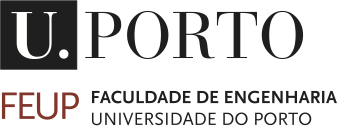   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt), **M. Rosário Pinho** (mrpinho@fe.up.pt)



FEUP, Fev. 2024

---


# **Notebook #08: Sliding mode control**

## **Activity 1**

Consider the following nonlinear system
\begin{align}
\dot x_1 &= x_2 \\
\dot x_2 &= a_1 x_1^2 + a_2 x_2 + u
\end{align}
where $x\in\mathbf{R}^2$ is the state and $u\in\mathbf{R}$ is the input and the model parameters $a_1$ and $a_2$ are unknown.



**1.1**
Given a desired reference signal $x_d(t)$ and its derivative $\dot x_d(t)$, design a sliding mode control law such that $x(t)$ converges to $x_d(t)$ as $t\to\infty$. Suppose at this state that we know $a_1$ and $a_2$.

**1.2**
Confirm the results through simulation by plotting the **time-evolution** of the state $x(t)$, the control signal $u(t)$, and the tracking error $\tilde x(t)$ for the desired reference signal $x_d(t) = \sin(t)$.

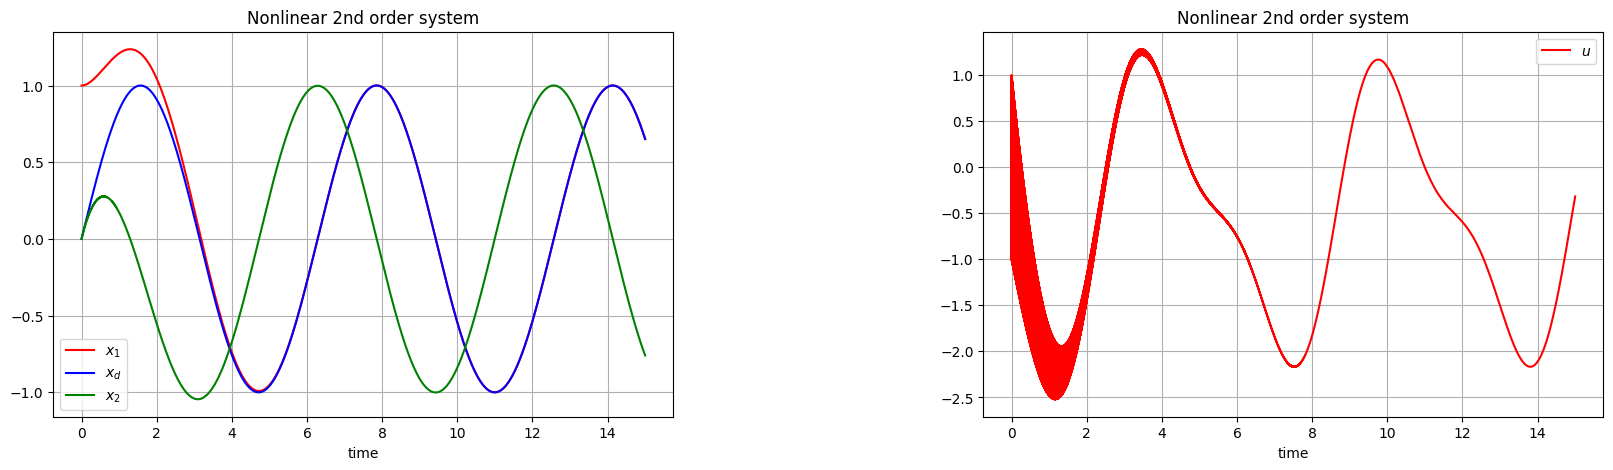

In [7]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def step_f(x,xd,dotxd,dotdotxd,dt):
  a1, a2 = 1, 1
  lambda1 = 1
#  epsilon = 0.1
  epsilon = 0.005
  K=10
  tilde_x1 = x[0]-xd
  tilde_x2 = x[1]-dotxd
  s = lambda1*tilde_x1 + tilde_x2
  if abs(s) < epsilon:
    v = -K*s/epsilon
  else:
    v = -K*np.sign(s)
  u = v + dotdotxd - lambda1*tilde_x2
  return ([ x[0]+x[1]*dt,
           x[1]+ (a1*x[0]**2 + a2*x[1] + u)*dt,
           u
                   ])


#Sample-time
dt = 0.001
t_end=15
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

w=1
x1_signal = np.zeros_like(t_signal)
x2_signal = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)
xd_signal= np.sin(w*t_signal)
xddot_signal=w*np.cos(w*t_signal)
xdotdot_signal=-w**2*np.sin(w*t_signal)

#Initial conditions of our system
x1_signal[0] = 1

# Iteration
for i in range(0,t_signal.shape[0]-1):
    x1_signal[i+1],x2_signal[i+1], u_signal[i+1] = step_f((x1_signal[i],x2_signal[i]),xd_signal[i],xddot_signal[i],xdotdot_signal[i],dt)

#plot
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


ax1.plot(t_signal, x1_signal, 'r-', label='$x_1$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.plot(t_signal, x2_signal, 'g-', label='$x_2$')
ax1.set_title("Nonlinear 2nd order system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal, u_signal, 'r-', label='$u$')
ax2.set_title("Nonlinear 2nd order system")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')
